In [10]:
import pandas as pd
from IPython.display import display
import seaborn as sns
import matplotlib.pyplot as plt

In [24]:
def k_means():
    
    #Step-1
    #create a dataframe to store the intermediate results
    #for storing attributes and values
    data_= dict()
    #storing the points as one column
    data_['Points']= [(point_x[i],point_y[i]) for i in range(n_points)]

    #for storing the Manhatten distance of points from centroids
    for i in range(k):
        #initialize all distance with 0
        data_['Centroid('+ str(centre_x[i])+','+str(centre_y[i])+')']= [0 for i in range(n_points)]

    #for storing cluster no.
    data_['Cluster']= [0 for i in range(n_points)]
    df= pd.DataFrame(data= data_)
    
    
    #for accessing centroid columns
    #type casting to list from Index Object
    #because then only we can use remove function
    columns= list(df.columns)
    #remove Point and Cluster attribute
    columns.remove('Points')
    columns.remove('Cluster')

#     print(columns)
    
    
    #Step-2
    for i in range(n_points):
        #store manhatten distance wrt to each centroid
        distance= list()
        for j in range(k):
            #calculate Manhatten distance
            distance_= abs(centre_x[j]-point_x[i])+abs(centre_y[j]-point_y[i])
            #print(i,columns[j])

            df.at[i,columns[j]]= distance_
            distance.append(distance_)

        #find minimum manhatten distance
        index= distance.index(min(distance))
        #print(distance)
        
        
#         Step-3
        #assign Cluster no. to each point
        df.at[i,'Cluster']= index+1
    
    #to display df in a better way
    display(df)
    
    
#     Step-4
    #calculate new centroid
    for i in range(k):
        #access Points belonging to ith cluster
        Points= list(df[df.Cluster == i+1]['Points'])

        x,y= 0,0
        length= len(Points)
        for point in Points:
            x+= point[0]
            y+= point[1]

        x= round(x/length,2)
        y= round(y/length,2)
        #update centroids
        centre_x[i],centre_y[i]= x,y
        
    #Step-5 Visualization
    sns.scatterplot(x=point_x,y=point_y,hue= df['Cluster'],palette=sns.color_palette('bright', n_colors=k))
    plt.show()

In [3]:
n_points= int(input("Enter no. of points: "))

Enter no. of points: 8


In [4]:
#input points
point_x= list()
point_y= list()
for i in range(n_points):
    x,y= map(int,input().split(','))
    
    point_x.append(x)
    point_y.append(y)

2,10
2,5
8,4
5,8
7,5
6,4
1,2
4,9


In [26]:
#input value of k
k= int(input('Enter no. of clusters required: '))

#input value of initial centroids
centre_x= []
centre_y= []
print('Enter initial centroids: ')

for i in range(k):
    x,y= map(int,input().split(','))
    
    centre_x.append(x)
    centre_y.append(y)

Enter no. of clusters required: 3
Enter initial centroids: 
2,10
1,2
5,8


Enter no. of iterations: 3


,Points,"Centroid(2,10)","Centroid(1,2)","Centroid(5,8)",Cluster
0,"(2, 10)",0,9,5,1
1,"(2, 5)",5,4,6,2
2,"(8, 4)",12,9,7,3
3,"(5, 8)",5,10,0,3
4,"(7, 5)",10,9,5,3
5,"(6, 4)",10,7,5,3
6,"(1, 2)",9,0,10,2
7,"(4, 9)",3,10,2,3


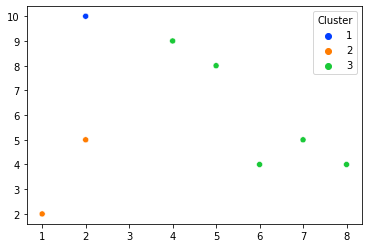

,Points,"Centroid(2.0,10.0)","Centroid(1.5,3.5)","Centroid(6.0,6.0)",Cluster
0,"(2, 10)",0,7,8,1
1,"(2, 5)",5,2,5,2
2,"(8, 4)",12,7,4,3
3,"(5, 8)",5,8,3,3
4,"(7, 5)",10,7,2,3
5,"(6, 4)",10,5,2,3
6,"(1, 2)",9,2,9,2
7,"(4, 9)",3,8,5,1


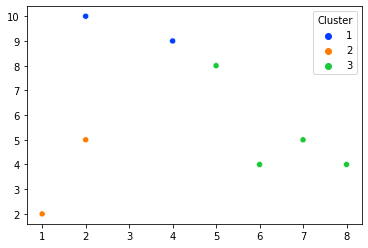

,Points,"Centroid(3.0,9.5)","Centroid(1.5,3.5)","Centroid(6.5,5.25)",Cluster
0,"(2, 10)",1,7,9,1
1,"(2, 5)",5,2,4,2
2,"(8, 4)",10,7,2,3
3,"(5, 8)",3,8,4,1
4,"(7, 5)",8,7,0,3
5,"(6, 4)",8,5,1,3
6,"(1, 2)",9,2,8,2
7,"(4, 9)",1,8,6,1


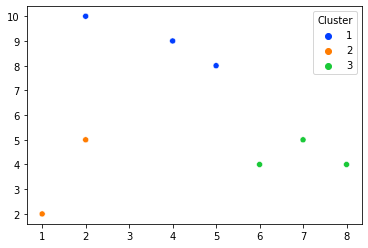

In [27]:
#input no. of iterations required
iterate= int(input('Enter no. of iterations: '))

#run iterations
for i in range(iterate):
    k_means()